Classify flowers into species based on their physical characteristics.


In [9]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
data = load_iris()
X = data.data  # Input features (e.g., sepal length, sepal width, petal length, petal width)
y = data.target  # Output labels (e.g., species: 0, 1, 2)

# Display dataset description
print(data.DESCR)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display example input and output
print("\nExample Predictions:")
for i in range(5):
    print(f"Input: {X_test[i]} => Predicted Output: {y_pred[i]}, True Output: {y_test[i]}")


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/0f/92/5c322336a0991949a1e91f6acd7e04f7e05b0fb6252a3f00fcdc0cb5e97d/mlxtend-0.23.3-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/17/1c/ccdd103cfcc9435a18819856fbbe0c20b8fa60bfc3343580de4be13f0668/scikit_learn-1.5.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.4 MB 939.4 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 939.4 kB/s eta 0:

In [12]:
!pip install mlxtend

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



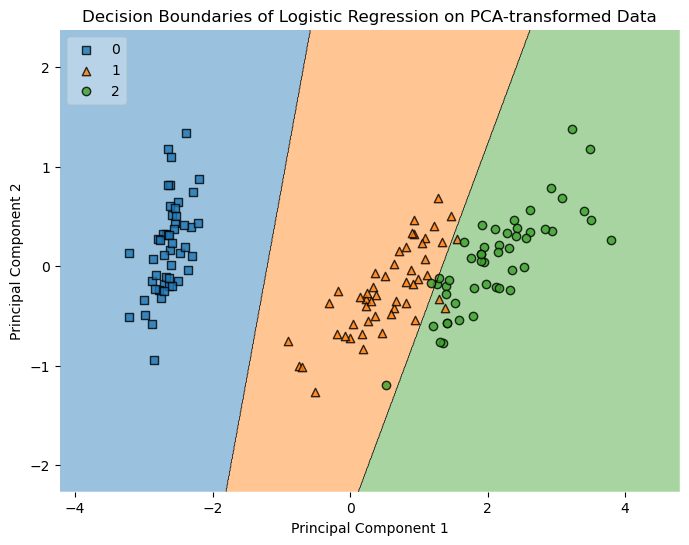

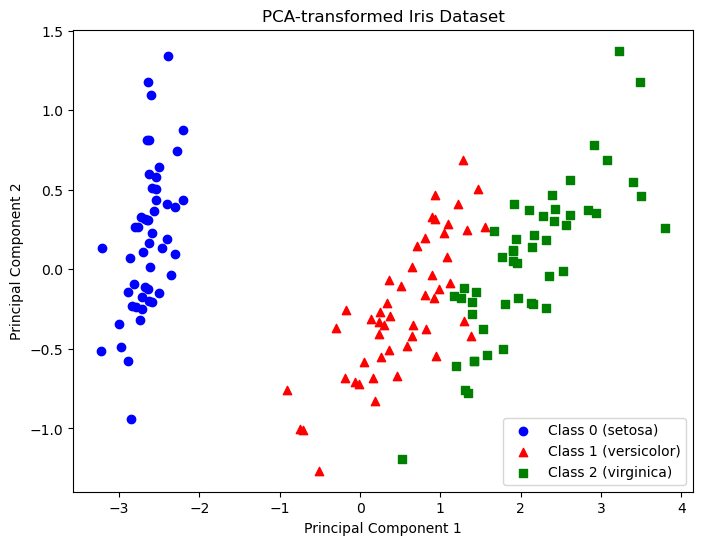


Example Predictions:
Input: [ 0.92172892 -0.18273779] => Predicted Output: 1, True Output: 1
Input: [-2.19982032  0.87283904] => Predicted Output: 0, True Output: 0
Input: [3.79564542 0.25732297] => Predicted Output: 2, True Output: 2
Input: [ 0.81329065 -0.1633503 ] => Predicted Output: 1, True Output: 1
Input: [1.33202444 0.24444088] => Predicted Output: 1, True Output: 1


In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# Load the Iris dataset
data = load_iris()
X = data.data  # Input features (sepal length, sepal width, petal length, petal width)
y = data.target  # Output labels (species: 0, 1, 2)

# Reduce the data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualize decision boundaries
plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, y, clf=model, legend=2)
plt.title("Decision Boundaries of Logistic Regression on PCA-transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Visualize the original data distribution
plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('o', '^', 's'), ('blue', 'red', 'green')):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1],
                label=f"Class {label} ({data.target_names[label]})",
                marker=marker, color=color)
plt.title("PCA-transformed Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Display example input and output
print("\nExample Predictions:")
for i in range(5):
    print(f"Input: {X_test[i]} => Predicted Output: {y_pred[i]}, True Output: {y_test[i]}")
